# Projet numérique de probabilités 

## Préambule

Dans ce projet, on va chercher à développer un algorithme permettant de générer des textures aléatoires reprenant certaines caractéristiques du mouvement brownien.
Dans un premier temps, on va s'intéresser à construire le mouvement brownien en une dimension comme limite d'une marche aléatoire. On verra ensuite une construction alternative qui permettra de conserver certaines de ses propriétés puis on la généralisera à 2 dimensions.


# Marche aléatoire

Soit $(X_i)_{i\in \mathbb{N}^\ast}$ une suite de variables aléatoires indépendantes telle que :

$$\mathbb{P}(X_i=x) = \left\{\begin{array}{ll}
\frac{1}{2} & \text{ si } x=1\\
\frac{1}{2} & \text{ si } x=-1\\
\end{array}\right.
\forall i\geq 1$$

On considère la suite $(Y_n)_{n \in \mathbb{N}}$, où $Y_0 = 0$ et 
$$Y_n=\sum_{i=1}^{n}X_i$$


1. Calculer l'espérance et la variance de $X_i$.
2. En déduire l'espérance et la variance de $Y_n$.
3. Montrer que $\forall n \in \mathbb{N}$, $\mathbb{P}_{Y_n|Y_{n-1} = y_{n-1}, \ldots, Y_{0} = y_{0}} = \mathbb{P}_{Y_n|Y_{n-1} = y_{n-1}}$. On dit que la suite $(Y_n)_{n \in \mathbb{N}}$ possède la propriété de Markov.
4. Montrer que $\mathrm{Cov}(Y_n,Y_{n'}) = \min(n,n')$ puis que $\frac12\mathbb{E}\left((Y_n-Y_{n+h})^2\right) = h/2$, pour $h>0$. Cette dernière quantité s'appelle le variogramme de $Y_n$ et peut s'interpréter comme une quantification de sa régularité.
5. Utiliser le théorème central limite pour montrer que
  $$\frac{Y_n}{\sqrt{n}}\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1),$$


**Réponse :**

*Question 1 :* $$ \forall i \in \mathbb{N}^*, \mathbb{E}(X_i)=\frac{1}{2} \times 1 + \frac{1}{2}\times (-1) = 0 $$ et $$ \mathbb{V}(X_i)=\mathbb{E}(X_i^2) = \frac{1}{2} + \frac{1}{2} = 1 $$

*Question 2 :* On en déduit que $ \forall n \in \mathbb{N}, \mathbb{E}(Y_n)=0 \text{ et } \mathbb{V}(Y_n) = \left\{\begin{array}{ll}
n & \text{ si } n \geq 1\\
0 & \text{ si } n=0\\
\end{array}\right. $

*Question 3 :*
$ \forall k \in \mathbb{Z} , \mathbb{P} (Y_n=k \mid Y_{n-1}=y_{n-1} ,\dots, Y_2=y_2 , Y_1=y_1, Y_0=y_0) = \dfrac{\mathbb{P}(Y_n=k, Y_{n-1}=y_{n-1}, \dots, Y_2=y_2 , Y_1=y_1, Y_0=y_0)}{\mathbb{P}(Y_{n-1}=y_{n-1}, \dots, Y_2=y_2 , Y_1=y_1, Y_0=y_0)} = \dfrac{\mathbb{P}(X_n=k-y_{n-1}, X_{n-1}=y_{n-1}-y_{n-2}, \dots, X_2=y_2-y_1 , X_1=y_1, 0=y_0)}{\mathbb{P}(X_{n-1}=y_{n-1}-y_{n-2}, \dots, X_2=y_2-y_1 , X_1=y_1, 0=y_0)} = \mathbb{P}(X_n=k-y_{n-1}) \text{ par indépendance.} $

De même,
$ \mathbb{P}(Y_n=k \mid Y_{n-1})= \mathbb{P}(Y_n=k-y_{n-1}) $

Conclusion :
$ \forall n \in \mathbb{N} $, $ \mathbb{P}_{Y_n|Y_{n-1} = y_{n-1}, \ldots, Y_{0} = y_{0}} = \mathbb{P}_{Y_n|Y_{n-1} = y_{n-1}} $

*Question 4 :*
$$ Cov(Y_n,Y_n')= \mathbb{E}(Y_nY_n') - \underbrace{\mathbb{E}(Y_n) \mathbb{E}(Y_n')}_{=0} = \sum_{i=1}^n \sum_{j=1}^{n'} \mathbb{E}(X_iX_j) = \sum_{i \neq j} \underbrace{\mathbb{E}(X_i) \mathbb{E}(X_j)}_{=0} + \sum_{k=1}^{min(n,n')} \underbrace{\mathbb{E}(X_k^2)}_{=1} = min(n,n') $$
On a aussi que : $$ \mathbb{E}( (Y_n-Y_{n+h})^2 ) = \mathbb{E}( Y_n^2 + Y_{n+h}^2 -2Y_nY_{n+h}) = n + n+h -2Cov(Y_n,Y_{n+h})=2n+h-2n=h $$
Conclusion : $$\frac{1}{2} \mathbb{E}( (Y_n-Y_{n+h})^2 ) = \frac{h}{2} $$

*Question 5:*
Les variables aléatoires $X_i$ sont de carré intégrable et indépendantes et identiquement distribuées, on peut donc appliquer le théorème de la limite centrale :
$$ \dfrac{ Y_n - \mathbb{E}(Y_n) }{ \sqrt{n} \times 1 } = \dfrac{Y_n}{ \sqrt{n} } \text{ converge en loi vers une variable aléatoire de loi } \mathcal{N}(0,1) $$


In [117]:
# chargement de dépendances
%pylab inline
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [118]:
# Initialisation de la graine
np.random.seed(1234)

# Comportement asymptotique

On introduit maintenant $t_i=\frac{i}{n}, i=0,\ldots,n$ et
$$Z^{(n)}_t= \frac{Y_{[nt]}}{\sqrt{n}}, t\in[0,1],$$
où $[\cdot]$ est la partie entière.

1. Montrer que $\bigcup_{i=0}^{n-1}(t_i,t_{i+1}]$ forme une partition de $(0,1]$.

2. Montrer que $Z^{(n)}_t=Z^{(n)}_{t_i}$ pour $i=[nt]$.

3. Par conséquent, $Z^{(n)}_t, t\in[0,1]$ est bien défini $\forall t \in [0,1]$. Implémenter un algorithme pour simuler $Z^{(n)}_t$ aux points $t_i,~ i \in\{0,\ldots,n\}$. Représenter une trajectoire pour $n$=1000.



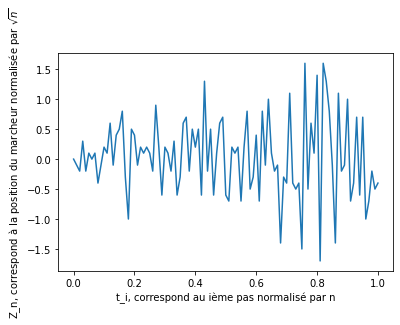

In [149]:
def X():
    return(np.random.choice(np.array([-1,1]) ) )

def Y(n): #Ce que j'ai fait revient à la vectoriser, il faut juste lui fournir un array ou une liste, même si qu'un nombre
    #if type(n)==int or type(n)==float64:
    #    n=np.array([n])
    #n=np.array(n)
    final=np.empty( (n.shape[0],)) #AR POOUR EVITER LA DOUBLE BOUCLE FOR, PRENDRE EXEMPLE SUR Z TIL
    for j in range(n.shape[0]):
        S=0
        for k in range( int(n[j])):
            S+=X()
        final[j]=S
    return(final)

def Z(n,i):
    ti=i/n
    return(Y(np.floor(n*ti))/np.sqrt(n))

n=100
x=np.arange(0,n+1,1)/n
y=Z(n,x*n)

plt.plot(x,y);
plt.xlabel("t_i, correspond au ième pas normalisé par n")
plt.ylabel(f"Z_n, correspond à la position du marcheur normalisée par $\sqrt{{n}}$")
plt.show()


<class 'numpy.ndarray'>


**Réponse :**

4. Montrer que $Z^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,t),~\forall t \in [0,1]$, en déduire la loi de $Z^{(n)}_1=\frac{Y_n}{\sqrt{n}}$ quand $n$
  tend vers l'infini.
  Construire un échantillon de taille 1000 de valeurs de $Z^{(n)}_1$ pour n = 1000. Représenter son histogramme et le comparer avec la densité gaussienne standard.



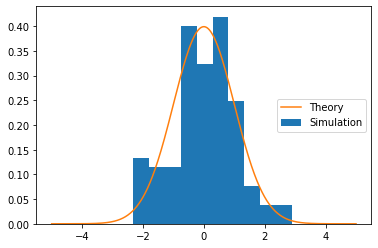

In [156]:
n=1000
Z_tot= [Z(n,np.array([n]))[0] for k in range(100)] #Il faut faire attention à prendre [0] car en sortie c'est une tableau numpy.
plt.hist(Z_tot,bins=10, label="Simulation", density=True) #Density divise par Z_tot.shape[0]
#Densité gaussiènne ;
x = np. linspace (-5,5,1000)
f_x = sps.norm.pdf(x) #Densite exponentielle
plt.plot(x,f_x,label="Theory")
plt.legend(loc="right");
#C'est pas mal, mais long...


**Remarque**

${\bf Z}_t=\lim_{n \to \infty} Z^{(n)}_t$ est le mouvement brownien standard sur $[0,1]$. 


# Une construction alternative

On considère maintenant la construction suivante, définie pour tout $t \in [0,1]$:
$$\tilde{Z}^{(n)}_t = \frac{1}{\sqrt{n}}\sum_{i=1}^n X_i (1_{[0,U_i]}(t)-1_{]U_i,1]}(t))$$
où les $X_i$ sont définis tels que précédemment et les $U_i$ sont des variables aléatoires i.i.d. de loi uniforme sur $[0,1]$.
Cette construction permet de définir un algorithme alternatif de simulation d'une (approximation de) trajectoire brownienne, cette fois-ci non standard au sens où on n'a pas systématiquement $\tilde{Z}^{(n)}_0 = 0$.

1. Discrétiser l'intervalle $[0,1]$ en 1000 points de manière régulière et implémenter l'algorithme (commencer par n = 1). Représenter une trajectoire pour $n = 1000$.

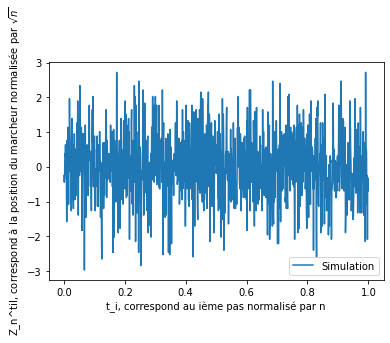

In [148]:
x=np.linspace(0,1,1000)

def U():
    return(sps.uniform.rvs())

def Z_til(n,t): #On la vectorise de manière à ce qu'on puisse mettre une liste pour t
    
    #if type(t)==np.float64:
    #    t=np.array([t])
    #t=np.array(t)
    S=np.zeros((t.shape[0],))
    for k in range(1,n+1):
        valeurs=sps.uniform.rvs(size=(t.shape[0],))
        changes=np.random.choice(np.array([-1,1]), size=(t.shape[0],) )


        #tab_1 = t[t <= valeurs] #On sélectionne juste les valeurs qui sont <= aux correspondantes
        S_change1=S[t<=valeurs] #On va agir par effet de bord, car on parle en vue, S_change est une vue de S, changer S_change changeS
        S[t<=valeurs]=S_change1 + changes[t<=valeurs]

        #tab_2 = t[t > valeurs] #On sélectionne juste les valeurs qui sont <= aux correspondantes
        S_change2=S[t>valeurs] #On va agir par effet de bord, car on parle en vue, S_change est une vue de S, changer S_change changeS
        S[t>valeurs]=S_change2 - changes[t>valeurs]
            

    return(S/np.sqrt(n))

n=1000
y=Z_til(n,x)

plt.plot(x,y,label="Simulation");
plt.xlabel("t_i, correspond au ième pas normalisé par n")
plt.ylabel(f"Z_n^til, correspond à la position du marcheur normalisée par $\sqrt{{n}}$")
plt.legend()
plt.show()


In [110]:
t=np.array([0.3,0.5,0.6])
valeurs=np.array([0.1,0.6,0.55])
print(t[t<= valeurs])
print( t<= valeurs)
tab_bool=np.array([True,False])
S=np.array([0.1,0.2,0.4])
print(S[t<=valeurs])

[0.5]
[False  True False]
[0.2]


In [145]:
sps.uniform.rvs(size=(10,))

array([0.35678229, 0.54317812, 0.87094369, 0.25535802, 0.18930057,
       0.20642147, 0.70536725, 0.3173318 , 0.13200822, 0.53345866])

2. Calculer l'espérance et la variance de $\tilde{Z}^{(n)}_t$. En déduire que $\forall t \in [0,1],~ \tilde{Z}^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1)$. Le vérifier expérimentalement aux points $\{0,0.25,0.5,0.75,1\}$ sur la base d'un échantillon de 1000 réalisations de $\tilde{Z}^{(n)}$.

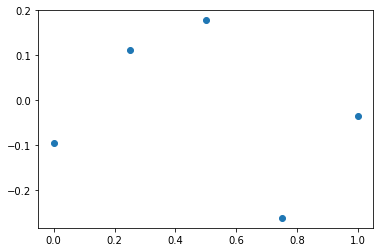

In [161]:
T=np.array([0,0.25,0.5,0.75,1])
n=100
#Espérance de Z_n, avec les points
repetition=100
S=np.zeros( (T.shape[0],))
for k in range(repetition):
    S=S+Z_til(n,T)
moy=S/repetition
plt.scatter(T,moy,label="Les espérances")

#Variance à faire


(100, 5)


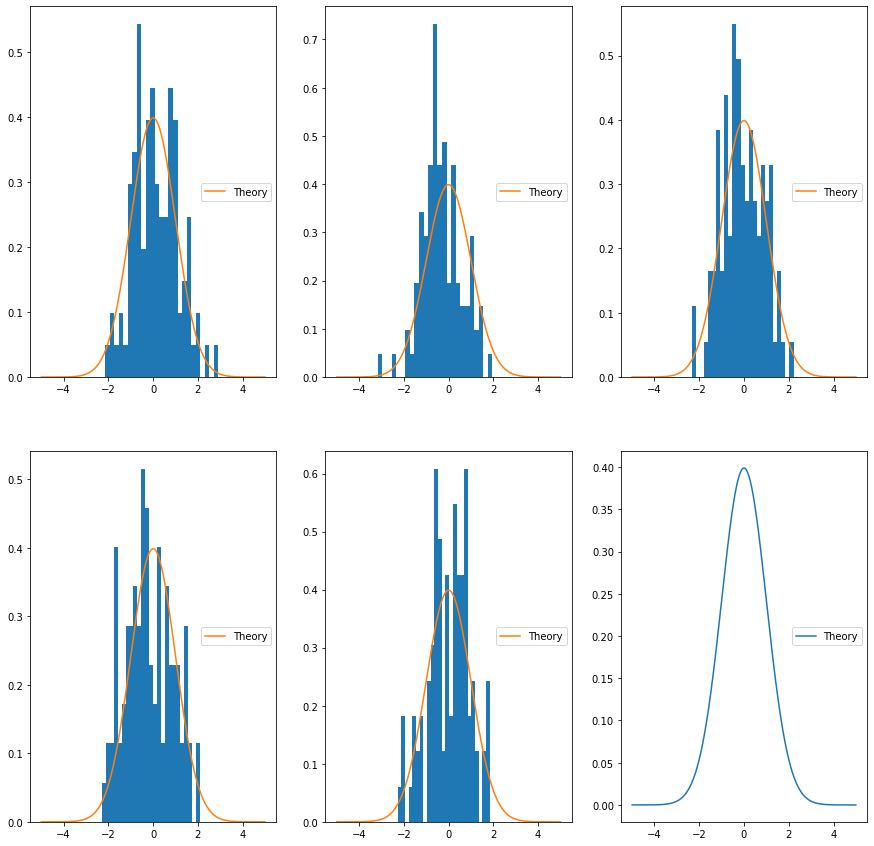

In [171]:
#Tracé des histogrammes, avec density true pour comparer les densités. (si même densité, même fonction de répartition donc Cv en loi)
n=1000
Z_tot_til=np.array([Z_til(n,T) for k in range(100)]) #Très très long
print(Z_tot_til.shape)
#plt.hist(Z_tot_til, bins=25, density=True)
taille=5
fig,axes=plt.subplots( 2,3,figsize=(taille*3,taille*3) )
axes[0,0].hist(Z_tot_til[:,0],bins=25,density=True)
axes[0,1].hist(Z_tot_til[:,1],bins=25,density=True)
axes[0,2].hist(Z_tot_til[:,2],bins=25,density=True)
axes[1,0].hist(Z_tot_til[:,3],bins=25,density=True)
axes[1,1].hist(Z_tot_til[:,4],bins=25,density=True)

x = np. linspace (-5,5,1000)
f_x = sps.norm.pdf(x)
for i in range(2):
    for j in range(3):
        axes[i,j].plot(x,f_x,label="Theory")
        axes[i,j].legend(loc="right");


3. Montrer que $\frac12\mathbb{E}\left((\tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h})^2\right) =  a h$ pour $h>0$ et tel que $t+h \leq 1$, pour une constante $a$ à déterminer.

4. Le vérifier expérimentalement en calculant $\frac1{2\text{card}\{(i,j),|t_i-t_j|=h\}}\sum_{|t_i-t_j|=h}(\tilde{Z}^{n}_{t_i} - \tilde{Z}^{n}_{t_j})^2$, où $\text{card}\{(i,j),|t_i-t_j|=h\}$ représente le nombre de couples $(t_i,t_j)$ distants de $h$, pour $h \in \{0.001,0.002,\ldots,0.3\}$. Représenter graphiquement cette quantité.

In [184]:
H=np.arange(0.001,0.301,0.001)
#N fixé
n=100
#Calcul du cardinal :
def card(n,H):
    compteur=np.zeros( (H.shape[0]))
    for i in range(1,n+1):
        for j in range(1,i): #On coupe la somme en deux du à la sympétrie grâce à la valeur absolue.
            compteur1=compteur[np.isclose(abs(i/n-j/n),H)]
            compteur[np.isclose(abs(i/n-j/n),H)]=compteur1+1
    return(2*compteur)
print(card(n,H))
                
    

[  0.   0.   0.   0.   0.   0.   0.   0.   0. 198.   0.   0.   0.   0.
   0.   0.   0.   0.   0. 196.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 194.   0.   0.   0.   0.   0.   0.   0.   0.   0. 192.   0.   0.
   0.   0.   0.   0.   0.   0.   0. 190.   0.   0.   0.   0.   0.   0.
   0.   0.   0. 188.   0.   0.   0.   0.   0.   0.   0.   0.   0. 186.
   0.   0.   0.   0.   0.   0.   0.   0.   0. 184.   0.   0.   0.   0.
   0.   0.   0.   0.   0. 182.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 180.   0.   0.   0.   0.   0.   0.   0.   0.   0. 178.   0.   0.
   0.   0.   0.   0.   0.   0.   0. 176.   0.   0.   0.   0.   0.   0.
   0.   0.   0. 174.   0.   0.   0.   0.   0.   0.   0.   0.   0. 172.
   0.   0.   0.   0.   0.   0.   0.   0.   0. 170.   0.   0.   0.   0.
   0.   0.   0.   0.   0. 168.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 166.   0.   0.   0.   0.   0.   0.   0.   0.   0. 164.   0.   0.
   0.   0.   0.   0.   0.   0.   0. 162.   0.   0.   0.   0.   0.   0.
   0. 

In [174]:
np.isclose(np.array([0.1,0.2]), np.array([0.10000000001,0]))

array([ True, False])

5. Décrire les différences et les similarités entre les deux approches.

# Génération de texture

L'algorithme précédent présente la propriété d'être aisément généralisable aux dimensions supérieures, contrairement au premier. Nous allons maintenant construire pas à pas un algorithme pour simuler selon ce modèle sur le domaine $[-1, 1]^2$. Comme dans le cas 1D, on va procéder par séparations aléatoires du domaine. Pour ce faire, nous allons simuler des droites aléatoires, avec la paramétrisation suivante :
$$x \cos(\alpha) + y \sin(\alpha) = p,$$
où $x,y \in [0,1]$ sont les coordonnées, $\alpha \sim \mathcal{U}_{[0,\pi]}$ est la variable d'*orientation*, $p \sim \mathcal{U}_{[-\sqrt{2},\sqrt{2}]}$ est la variable de *position*.

On peut ainsi écrire la version 2D de $\tilde{Z}$ de la manière suivante :
$$\tilde{Z}^{(n)}_{(x,y)} = \frac{1}{\sqrt{n}}\sum_{i=1}^n X_i (1_{\{x \cos(\alpha) + y \sin(\alpha) \leq p\}}-1_{\{x \cos(\alpha) + y \sin(\alpha) > p\}})$$

1. Représenter 10 droites aléatoires sur le domaine $[-1, 1]^2$.

2. L'étape suivante consiste à attribuer une valeur +1 ou -1 à chaque partie du domaine, délimitées par une droite aléatoire. Générer une droite aléatoire, puis assigner une valeur aléatoire +1 ou -1 en tous points d'une grille régulière de discrétisation du domaine $[-1,1]^2$ de dimensions 200x200 (voir **np.meshgrid** et **plt.pcolormesh**).

3. Combiner les résultats des deux questions précédentes pour générer une réalisation de $\tilde{Z}$ sur $[-1,1]^2$ pour $n = 100, 1000$ et $10000$ sur la même grille de discrétisation. Commenter. 

4. Calculer $\frac1{2\text{card}\{(i,j),|t_i-t_j|=h\}}\sum_{|t_i-t_j|=h}(\tilde{Z}^{n}_{t_i} - \tilde{Z}^{n}_{t_j})^2$ pour $h \in \{0.001,0.002,\ldots,0.3\}$ le long des axes verticaux et horizontaux. Tracer le graphique correspondant. Commenter.

5. Générer une réalisation de $\tilde{Z}$ sur $[-10,10]^2$. On prendra soin de modifier la loi des paramètres des droites aléatoires en conséquence. Commenter. 

6. Une généralisation à deux dimensions d'une discrétisation du mouvement brownien standard peut être définie de la manière suivante : notant $(x_i,y_i)$ les coordonnées des points de la grille de discrétisation du domaine $[0,1]^2$, le vecteur formé des $Z_{(x_i,y_i)}$ est gaussien, centré et de covariance $\text{Cov} = \min(x_i,x_j) \times \min(y_i,y_j)$. Proposer et implémenter un algorithme de simulation de ce modèle sur une grille régulière de discrétisation du domaine $[0,1]^2$. Quelles difficultés rencontrez-vous ?